# Pillowの作業フロー（その3）

1. Image.open で画像を読み込む
2. 画像をグレースケールに変換する
3. 画像をゴニョゴニョする
4. Image.save で編集した画像を保存する

Populating the interactive namespace from numpy and matplotlib


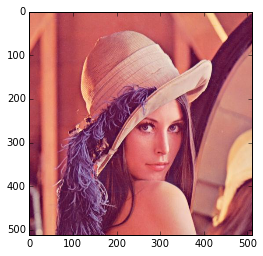

In [1]:
%pylab inline
from PIL import Image,ImageDraw,ImageFont
img = Image.open('work-image/lena.jpg')
pl_img = np.array(img) ; plt.imshow( pl_img ) # 表示

In [2]:
# グレースケールに変換
gray_img = img.convert("L")

## 意図した表示にならない件
ちなみに、保存したファイルは正常にグレースケールに変換されていました。

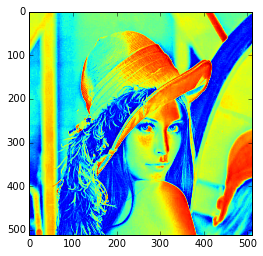

In [19]:
pl_img = np.array(gray_img) ; plt.imshow( pl_img ) # 表示

In [4]:
# ファイルの情報表示
print('size    : ', gray_img.size)
print('format  : ', gray_img.format) 
print('mode    : ', gray_img.mode) 
print('palette : ', gray_img.palette) 
print('info    : ', gray_img.info) 

size    :  (512, 512)
format  :  None
mode    :  L
palette :  None
info    :  {'jfif_density': (1, 1), 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif': 257}


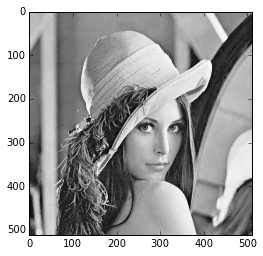

In [5]:
# こうしなければならんらしい
import matplotlib.cm as cm
plt.imshow(pl_img, cmap = cm.Greys_r)

さて、今回はフィルタ処理です
## 組み込みフィルタ
はじめは組み込みフィルタから

In [7]:
from PIL import ImageFilter, ImageOps

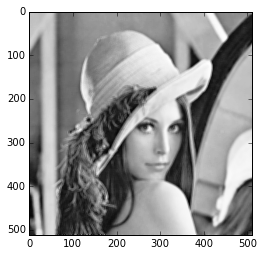

In [8]:
# ぼかし
pl_img = np.array(gray_img.filter(ImageFilter.BLUR)); plt.imshow(pl_img, cmap = cm.Greys_r)

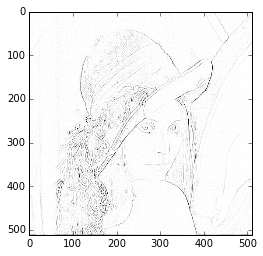

In [9]:
# 輪郭抽出
pl_img = np.array(gray_img.filter(ImageFilter.CONTOUR)); plt.imshow(pl_img, cmap = cm.Greys_r)

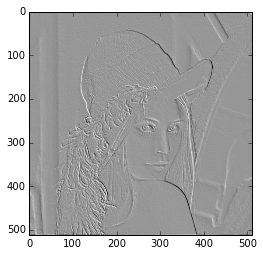

In [12]:
# エンボス加工
pl_img = np.array(gray_img.filter(ImageFilter.EMBOSS)); plt.imshow(pl_img, cmap = cm.Greys_r)

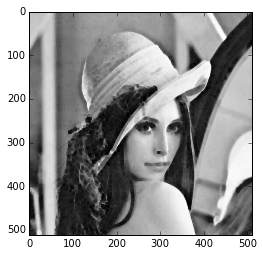

In [13]:
# 最小値フィルタ
pl_img = np.array(gray_img.filter(ImageFilter.MinFilter(5))); plt.imshow(pl_img, cmap = cm.Greys_r)

## 自前のフィルタ

理論的なことは後で書く（本当に書くのか？）


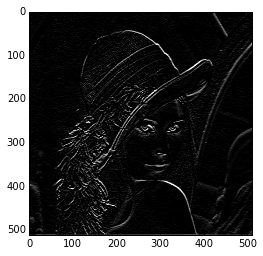

In [14]:
# 縦方向のエッジを検出
flist =  [1,   1,  1,
          0,   0,  0,
         -1,  -1, -1]

flt = ImageFilter.Kernel((3, 3), flist, scale=1)
filter_img = gray_img.filter(flt)

pl_img = np.array(filter_img) ; plt.imshow(pl_img, cmap = cm.Greys_r)

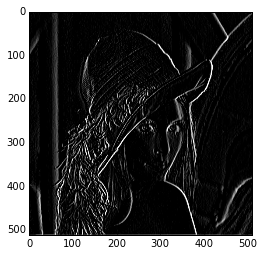

In [15]:
# 横方向のエッジを検出
flist =  [1,   0, -1,
          1,   0, -1,
          1,   0, -1]
flt = ImageFilter.Kernel((3, 3), flist, scale=1)
filter_img = gray_img.filter(flt)

pl_img = np.array(filter_img) ; plt.imshow(pl_img, cmap = cm.Greys_r)

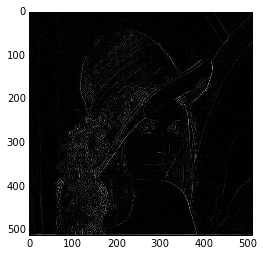

In [16]:
# 4傍近接ラプラシアン
flist = [0,  1, 0,
         1, -4, 1,
         0,  1, 0]
flt = ImageFilter.Kernel((3, 3), flist, scale=1)
filter_img = gray_img.filter(flt)

pl_img = np.array(filter_img) ; plt.imshow(pl_img, cmap = cm.Greys_r)

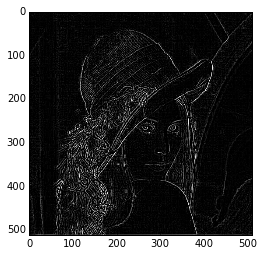

In [17]:
# 8傍近接ラプラシアン
flist = [1,  1, 1,
         1, -8, 1,
         1,  1, 1]
flt = ImageFilter.Kernel((3, 3), flist, scale=1)
filter_img = gray_img.filter(flt)

pl_img = np.array(filter_img) ; plt.imshow(pl_img, cmap = cm.Greys_r)

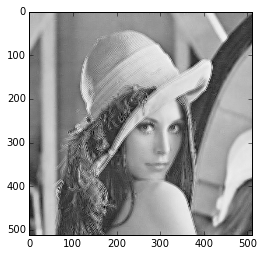

In [18]:
# 8傍近接ラプラシアンの利用例
flist = [0.4,  0.4, 0.4,
         0.4, -2.2, 0.4,
         0.4,  0.4, 0.4]
flt = ImageFilter.Kernel((3, 3), flist, scale=1)
filter_img = gray_img.filter(flt)

pl_img = np.array(filter_img) ; plt.imshow(pl_img, cmap = cm.Greys_r)